In [8]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
import keras as keras
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.mobilenet import preprocess_input, MobileNet
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import sys
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns


In [9]:
# Load base model
base_model = MobileNet(weights='imagenet', include_top=False)

# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
# we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)  # dense layer 2
x = Dense(512, activation='relu')(x)  # dense layer 3
preds = Dense(3, activation='softmax')(x)

# Assign transfer base model + new layers to model
model = Model(inputs=base_model.input, outputs=preds)
model.summary()

# Assign Trainable layers and freeze layer -> ลองเปลี่ยน ช่วง layer ในการ trainable True/False 3 ค่า เพื่อดูความแตกต่างของผลลัพธ์ที่ได้
for layer in model.layers[:20]:
    layer.trainable = False
for layer in model.layers[20:]:
    layer.trainable = True


17235968/17225924 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128    

In [15]:
# Create DataGeneartor Object
seed_value = 0
datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.5,
                             width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.15, horizontal_flip=True,
                             fill_mode="nearest")

# Create Train Image generator
train_generator = datagen.flow_from_directory('./Ship/train/',
                                              target_size=(224, 224), color_mode='rgb',
                                              batch_size=32,
                                              class_mode='categorical', seed= seed_value,
                                              shuffle=True)

# Create Validation Image generator
val_generator = datagen.flow_from_directory('./Ship/validate',
                                            target_size=(224, 224), color_mode='rgb',
                                            batch_size=16,
                                            class_mode='categorical', seed=seed_value,
                                            shuffle=True)


Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


<Figure size 432x288 with 0 Axes>

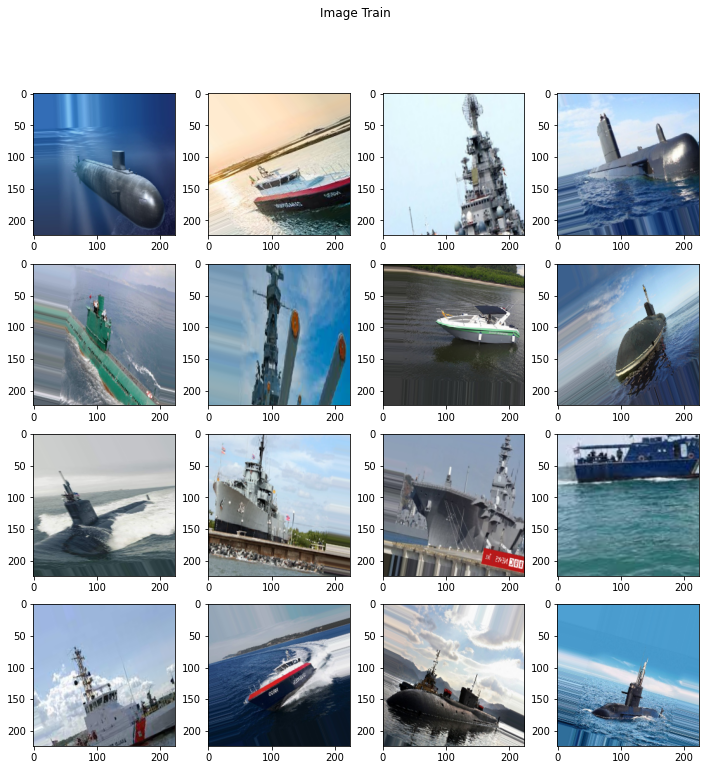

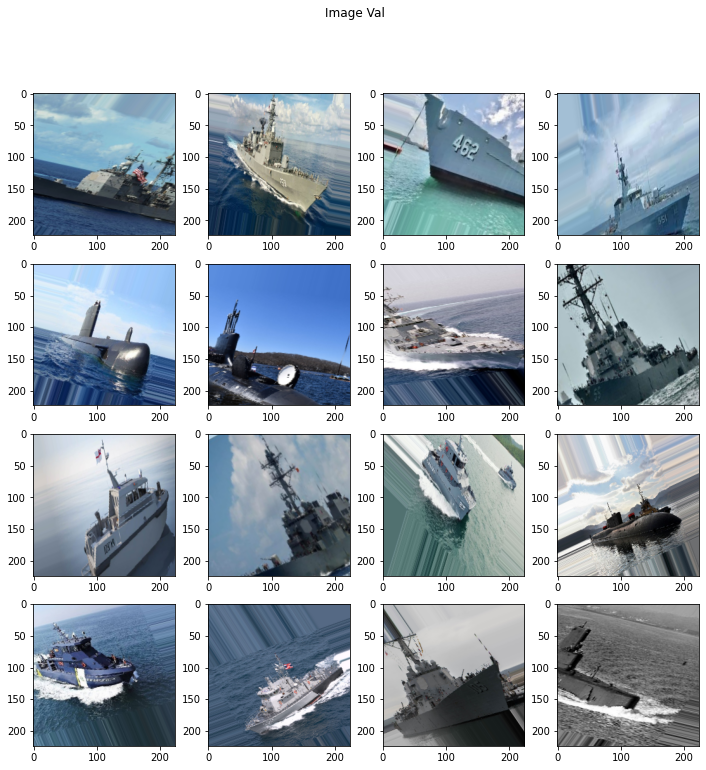

In [16]:
batch1 = train_generator.next()
img_train = (batch1[0]*255)
batch2 = val_generator.next()
img_val = (batch2[0]*255)

plt.figure()
f1, ax1 = plt.subplots(4,4,figsize=(12,12))
f2 ,ax2 = plt.subplots(4,4,figsize=(12,12))
f1.suptitle('Image Train')
f2.suptitle('Image Val')
index = 0
for i in range(4):
    for j in range(4):
        ax1[i][j].imshow(img_train[index].astype(np.uint8))
        ax2[i][j].imshow(img_val[index].astype(np.uint8))
        # ax1[i][j].title.set_text('img_train')
        # ax2[i][j].title.set_text('img_val')
        index += 1